In [12]:
import os
from os.path import abspath, join

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

from src.data.load_dataset import generate_frequency_detection, generate_frequency_XOR

In [19]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [20]:
data_dir = abspath(join(os.getcwd(), '../../'))

### Plot frequency detection results
The mean and standard deviation from 5 trials

<Figure size 432x288 with 0 Axes>

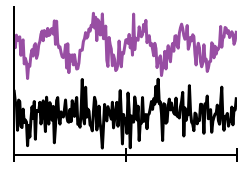

In [115]:
# plot the frequency detection task
num_samples, sampling_rate, freq, duration, snr = 5000, 2000, 50, 0.1, 0.8
X, y = generate_frequency_detection(num_samples, sampling_rate, freq, duration, snr, seed=20)
N = int(sampling_rate * duration)
t = np.arange(N) / sampling_rate * 1000

fig = plt.figure()
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(211)
plt.plot(t, X[y == 1][0], c='#984ea3', lw=3, alpha=1, label='$\omega_1=$%d Hz' % freq)
plt.plot(t, X[y == 0][0] - 1.2, c='#000000', lw=3, alpha=1,label=r'white noise')

# format ticks
plt.yticks([])
ax.set_xticklabels([])
plt.xticks(np.arange(0, 150, 50))
plt.xlim(0, 100)

plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_detection_task.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

sensilla, (281, 0.0143)
classical, (281, 0.7714)
incompatible, (281, 20.2143)


[Text(1, 0, ''), Text(100, 0, ''), Text(200, 0, ''), Text(300, 0, '')]

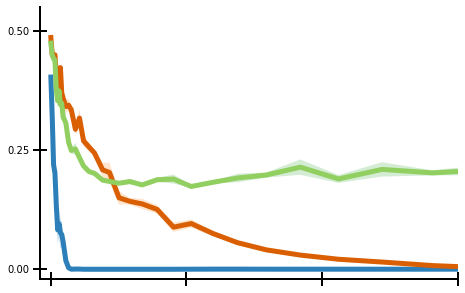

In [103]:
# plot the frequency detection results
with open(data_dir + '/models/results/freq_detection/freq_detection_sensilla_estimator.pickle', 'rb') as handle:
    results = pickle.load(handle)
    
colors = {'sensilla': '#2c7fb8', 'classical': '#d95f02', 'incompatible': '#91cf60'}
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for key, col in colors.items():
    hidden_size = results[key]['hidden_size']
    avg_test_err = 1 - np.array(results[key]['mean'])
    std_err = np.array(results[key]['std_err'])
    plt.plot(hidden_size, avg_test_err, label=key, lw=5, c=col)
    plt.fill_between(hidden_size, avg_test_err - std_err, avg_test_err + std_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (key, num_neurons[32], avg_test_err[32] * 100))

# format limits
plt.xlim([-7, 300])
plt.yticks(np.arange(0, 0.55, 0.25))
plt.ylim([-0.02, 0.55])
plt.xticks([1, 100, 200, 300])
ax.set_xticklabels([])
ax.set_yticklabels()

# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_detection_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

### Plot frequency XOR results
The mean and std deviation from 5 trials

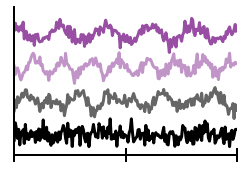

In [114]:
# plot the frequency XOR task'
num_samples, sampling_rate, freq1, freq2, duration, snr = 5000, 2000, 50, 80, 0.1, 0.8
X, y = generate_frequency_XOR(num_samples, sampling_rate, freq1, freq2, duration, snr, seed=20, shuffle=False)
t = np.arange(0, duration, 1 / sampling_rate) * 1000

fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(211)
plt.plot(t, X[0] + 1.25, c='#984ea3', lw=3, alpha=1, label='$\omega_1=$%d Hz' % freqs[0])
plt.plot(t, X[1250], c='#984ea3', lw=3, alpha=0.6, label=r'$\omega_2=$%d Hz' % freqs[1])
plt.plot(t, X[2501] - 1.25, c='#000000', lw=3, alpha=0.6, label=r'mixed $%d$ & $%d$ Hz' % (freqs[0], freqs[1]))
plt.plot(t, X[-1] - 2.5, c='#000000', lw=3, alpha=1, label='white noise')

# format ticks
plt.xticks(np.arange(0, 150, 50))
plt.yticks([])
plt.xlim(0, 100)
plt.ylim(-3.25, 2.25)
ax.set_xticklabels([])
    
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_XOR_task.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

sensilla, (281, 0.0000)
classical, (281, 9.1714)
incompatible, (281, 41.3571)


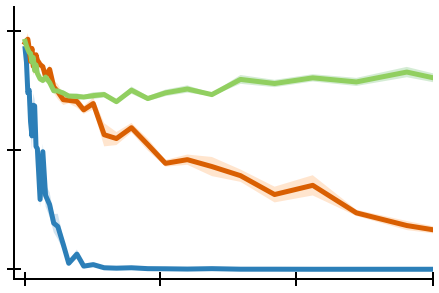

In [97]:
# plot the frequency XOR results
with open(data_dir + '/models/results/freq_XOR/freq_XOR_sensilla_estimator.pickle', 'rb') as handle:
    results = pickle.load(handle)
    
colors = {'sensilla': '#2c7fb8', 'classical': '#d95f02', 'incompatible': '#91cf60'}
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for key, col in colors.items():
    hidden_size = results[key]['hidden_size']
    avg_test_err = 1 - np.array(results[key]['mean'])
    std_err = np.array(results[key]['std_err'])
    plt.plot(hidden_size, avg_test_err, label=key, lw=5, c=col)
    plt.fill_between(hidden_size, avg_test_err - std_err, avg_test_err + std_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (key, num_neurons[32], avg_test_err[32] * 100))

# format limits
plt.xlim([-7, 300])
plt.yticks(np.arange(0, 0.55, 0.25))
plt.ylim([-0.02, 0.55])
plt.xticks([1, 100, 200, 300])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_XOR_results.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)